# Predicting BitCoin Price using Real Time Price and Tweets from Twitter





Author - Yassaman Davilu


<img src = 'https://s3-ap-southeast-1.amazonaws.com/cs-public-uploads-prod/3b9065c7-e33b-4965-af4a-e3dae46f5f3c'/>

In [57]:
# Packages for data analysis
import GetOldTweets3 as got3

import datetime
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import warnings
import sklearn.exceptions
warnings.filterwarnings("ignore", category=sklearn.exceptions.UndefinedMetricWarning)
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix, roc_curve, auc

# visual your data
import matplotlib.pyplot as plt
import seaborn as sns;sns.set(font_scale=1)

# Allows charts to appear in the notebook
%matplotlib inline

import os
import psutil
process = psutil.Process(os.getpid())
from tqdm import tqdm
from itertools import combinations
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from imblearn.ensemble import BalanceCascade
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import ClusterCentroids,NearMiss, RandomUnderSampler
from sklearn.metrics import recall_score,accuracy_score,confusion_matrix, f1_score, precision_score, auc,roc_auc_score,roc_curve, precision_recall_curve
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report 
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from time import *

from sklearn.model_selection import RandomizedSearchCV
from scipy import stats

from sklearn.ensemble import GradientBoostingClassifier 
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.exceptions import DataConversionWarning
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot as plt
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import time
import numpy as np
import datetime
import re
import numpy as np
from textblob import TextBlob

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

label_size = 14
plt.rcParams['xtick.labelsize'] = label_size 
plt.rcParams['ytick.labelsize'] = label_size 

plt.style.use('fivethirtyeight')

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yassamandavilu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#### Fetch Tweets from Twitter using Get Old Tweets Lirar\y which only allows to extract historical tweets older than a week 

In [58]:
start = datetime.datetime.strptime("2019-01-01", "%Y-%m-%d")
end = datetime.datetime.strptime(datetime.date.today().strftime("%Y-%m-%d"), "%Y-%m-%d")
date_generated = [start + datetime.timedelta(days=x) for x in range(0, (end-start).days)]

start_dates = []
for date in date_generated:
    d = date.strftime("%Y-%m-%d")
    start_dates.append(d)
    
start = datetime.datetime.strptime("2019-01-02", "%Y-%m-%d")
end = datetime.datetime.strptime((datetime.date.today() + datetime.timedelta(days=1)).strftime("%Y-%m-%d"), "%Y-%m-%d")
date_generated = [start + datetime.timedelta(days=x) for x in range(0, (end-start).days)]

end_dates = []
for date in date_generated:
    d = date.strftime("%Y-%m-%d")
    end_dates.append(d)

In [59]:
max_tweets = 1
tweet_date = []
tweets_text = []
tweets_favorites = []
tweets_retweets = []

for a, b in zip(start_dates, end_dates):
    tweetCriteria = got3.manager.TweetCriteria().setSince(a).setUntil(b).setQuerySearch("bitcoin").setTopTweets(True).setMaxTweets(max_tweets)
    tweet = got3.manager.TweetManager.getTweets(tweetCriteria)[0]
    print(tweet.date)
    print(tweet.text)
    print(tweet.favorites)
    print(tweet.retweets)
    
    tweet_date.append(tweet.date)
    tweets_text.append(tweet.text)
    tweets_favorites.append(tweet.favorites)
    tweets_retweets.append(tweet.retweets)

2019-01-01 23:57:17+00:00
What I said was “With ILP, trillions of transactions per second become possible, but only with a scalable digital asset, like $XRP.” Just because #Bitcoin is slower, more expensive, and lacking governance, doesn’t make #XRP my religion. Utility always wins.pic.twitter.com/jnZvGSsBzv
23
4
2019-01-02 23:58:07+00:00
Bitcoin. The Terrifying Rise of Financial Blacklisting https://buff.ly/2CKzpS6
118
50
2019-01-03 23:59:44+00:00
Happy birthday Bitcoin. This bumblebee of software, that nobody still understands how it works. Yet you run a command from your computer and a million strangers all over the world gladly send money, just like that. To me that’s still the most intriguing part. That it works.
166
24
2019-01-04 23:57:53+00:00
#FF @Witty_Crypto @kissmybtc @Juni0rLancaster @ltc_angel @nicnastyyy @Tha_Crypto_Guy @GaryDeSnailBot @Ars0nic @JeredTheRealtor @GemCrypto @CryptoGayGuy @theartistcoach @doc_bitcoin @TheCryptoMonk @berluscoini @3rdImpulse Too many to fit. Y

2019-02-05 23:58:47+00:00
The 800-pound gorilla of social media just became a #Bitcoin HODL’er. #bullishAFhttps://twitter.com/jack/status/1092914316729147392 …
104
17
2019-02-06 23:58:59+00:00
Increasing #of coins to fix a future perceived security issue would violate the "bitcoin fiat proposal": "Our proposal is that any changes to Bitcoin should be made with full consideration towards maintaining the apolitical nature of its price signal." https://medium.com/@rextar4444/a-bitcoin-fiat-proposal-2e1378e77849 …
4
2
2019-02-07 23:59:06+00:00
*opens @CashApp* *buys bitcoin* https://twitter.com/StephanieKelton/status/1093575469440618496 …
89
7
2019-02-08 23:59:12+00:00
Crypto is up $10BB in only a couple hours @litecoin is up 30% @ethereum up 13% @bitcoin up 7.5% @Ripple up 6.5% and the list goes on! What we're seeing here is a class action crypto rally. Whether it's long term or not, people aren't backing down on cryptocurrency #btc #tradingpic.twitter.com/H38grq9ahk
8
2
2019-02-09 23:56:

2019-03-11 23:59:57+00:00
MrHodl keeps apologizing. Bitcoin never apologizes.
16
2
2019-03-12 23:46:37+00:00
$mtl looking strong as well. I still think we're on the tail end of alt moves before bitcoin nukes, but I'm willing to gamble. I won't buy metal spot, but if it keeps making higher closes on lower timeframes I'll pop in before/as it goes parabolic. pic.twitter.com/GD2iiI893Z
12
3
2019-03-13 23:50:36+00:00
Canadian police are seeking information on individuals allegedly involved in fraudulent Bitcoin transactions https://cointelegraph.com/news/canadian-police-asks-for-public-assistance-to-identify-bitcoin-fraudsters …
23
12
2019-03-14 23:57:46+00:00
#follow target1000 #followers. @Block30Labs #BTC #LTC #ETH #DGB #XLM #bitcoin #Blockchain #crypto Get behind @Block30Labs next generation revolution in #Blockchain #cryptocurrencypic.twitter.com/ToZGvYbItt
25
12
2019-03-15 23:52:51+00:00
$BTC - right there on the edge... #bitcoin will take the whole #crypto market with it on this next

In [60]:
tweets_df = pd.DataFrame({'Date' : tweet_date,
                          'Tweet' : tweets_text})

tweets_df['Date'] = tweets_df['Date'].dt.date
print(tweets_df.info())
tweets_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 2 columns):
Date     83 non-null object
Tweet    83 non-null object
dtypes: object(2)
memory usage: 1.4+ KB
None


,Date,Tweet
0,2019-01-01,"What I said was “With ILP, trillions of transa..."
1,2019-01-02,Bitcoin. The Terrifying Rise of Financial Blac...
2,2019-01-03,Happy birthday Bitcoin. This bumblebee of soft...
3,2019-01-04,#FF @Witty_Crypto @kissmybtc @Juni0rLancaster ...
4,2019-01-05,"If #bitcoin is having a bank in your pocket, #..."


In [61]:
tweets_df.describe()

,Date,Tweet
count,83,83
unique,83,83
top,2019-03-24,"Ripple CTO Says #Bitcoin Is at a 'Dead End', R..."
freq,1,1


In [62]:
pd.isnull(tweets_df).any()

Date     False
Tweet    False
dtype: bool

In [63]:
def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())


def analyse_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    return analysis.sentiment.polarity

In [64]:
# We create a column with the result of the analysis:
tweets_df['SA'] = np.array([ analyse_sentiment(clean_tweet(tweet)) for tweet in tweets_df['Tweet'] ])

# We display the updated dataframe with the new column:
display(tweets_df.head(10))

,Date,Tweet,SA
0,2019-01-01,"What I said was “With ILP, trillions of transa...",0.042857
1,2019-01-02,Bitcoin. The Terrifying Rise of Financial Blac...,-0.500000
2,2019-01-03,Happy birthday Bitcoin. This bumblebee of soft...,0.525000
3,2019-01-04,#FF @Witty_Crypto @kissmybtc @Juni0rLancaster ...,0.450000
4,2019-01-05,"If #bitcoin is having a bank in your pocket, #...",0.000000
5,2019-01-06,"Register, Share your personal Referral link wi...",0.000000
6,2019-01-07,Understanding the history of is imperative to ...,-0.200000
7,2019-01-08,Bitcoin doesn’t give two fcks about this. http...,0.000000
8,2019-01-09,Feeling gloomy for missing out on #bitcoin $bt...,-0.095833
9,2019-01-10,Synced a new bitcoin node on 16gb/320gb SSD/6C...,0.118182


In [65]:
pos=tweets_df['SA']==1
pos.value_counts()

neg=tweets_df['SA']==-1
neg.value_counts()

# We construct lists with classified tweets:

pos_tweets = [ tweet for index, tweet in enumerate(tweets_df['Tweet']) if tweets_df['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(tweets_df['Tweet']) if tweets_df['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(tweets_df['Tweet']) if tweets_df['SA'][index] < 0]

# We print percentages:

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(tweets_df['Tweet'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(tweets_df['Tweet'])))
print("Percentage of negative tweets: {}%".format(len(neg_tweets)*100/len(tweets_df['Tweet'])))

Percentage of positive tweets: 56.626506024096386%
Percentage of neutral tweets: 24.096385542168676%
Percentage of negative tweets: 19.27710843373494%


In [ ]:
tweets_df.to_csv('tweets_df.csv', index = False)
tweets_df = pd.read_csv('tweets_df.csv')

tweets_df['positive'] = tweets_df['SA'] > 0
tweets_df['neutral'] = tweets_df['SA'] == 0
tweets_df['negative'] = tweets_df['SA'] < 0

tweets_df.head()

#### Fetching BTC OHLC data from COIN Market CAP

In [70]:
# get market info for bitcoin from the start of 2016 to the current day
bitcoin_market_info = pd.read_html("https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20190101&end="+time.strftime("%Y%m%d"))[0]
# convert the date string to the correct date format
bitcoin_df = bitcoin_market_info.assign(Date=pd.to_datetime(bitcoin_market_info['Date']))
# convert to int
bitcoin_df['Volume'] = bitcoin_market_info['Volume'].astype('int64')
# look at the first few rows
bitcoin_df.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap']
bitcoin_df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2019-03-24,4035.16,4040.70,4006.19,4022.17,9144851065,70823042992
1,2019-03-23,4022.71,4049.88,4015.96,4035.83,9578850549,71056017910
2,2019-03-22,4028.51,4053.91,4021.54,4023.97,9252935969,70840048102
3,2019-03-21,4083.95,4097.36,4005.15,4029.33,10831212662,70926226882
4,2019-03-20,4070.79,4089.46,4031.11,4087.48,10175916388,71942444088


In [72]:
df = bitcoin_df.copy()
df.set_index(['Date'],inplace=True)
df.head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2019-03-24,4035.16,4040.70,4006.19,4022.17,9144851065,70823042992
2019-03-23,4022.71,4049.88,4015.96,4035.83,9578850549,71056017910
2019-03-22,4028.51,4053.91,4021.54,4023.97,9252935969,70840048102
2019-03-21,4083.95,4097.36,4005.15,4029.33,10831212662,70926226882
2019-03-20,4070.79,4089.46,4031.11,4087.48,10175916388,71942444088


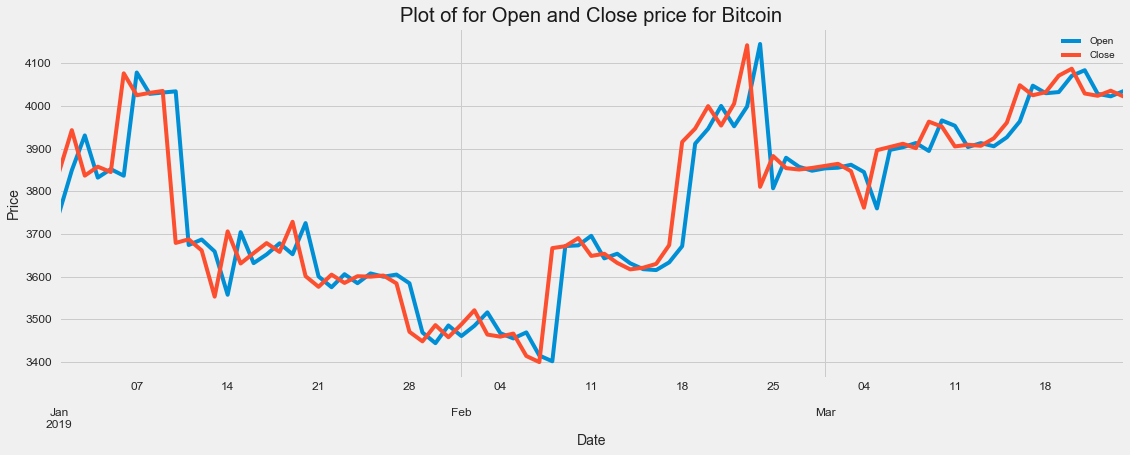

In [119]:
df.plot(figsize=(17,6),y=['Open','Close'],title='Plot of for Open and Close price for Bitcoin')
plt.ylabel('Price')
plt.xlabel('Date')


plt.show()

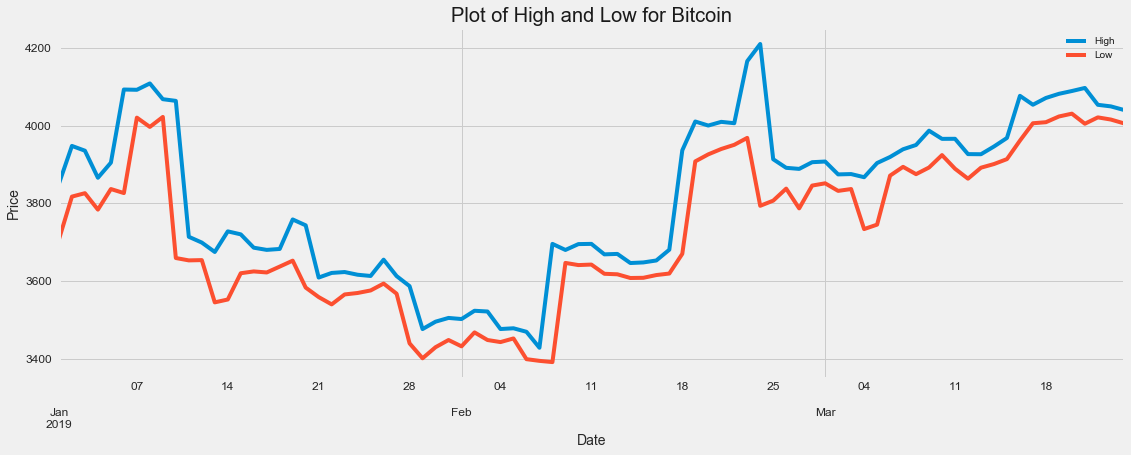

In [120]:
df.plot(figsize=(17,6),y=['High','Low'],title='Plot of High and Low for Bitcoin')
plt.ylabel('Price')
plt.xlabel('Date')

plt.show()

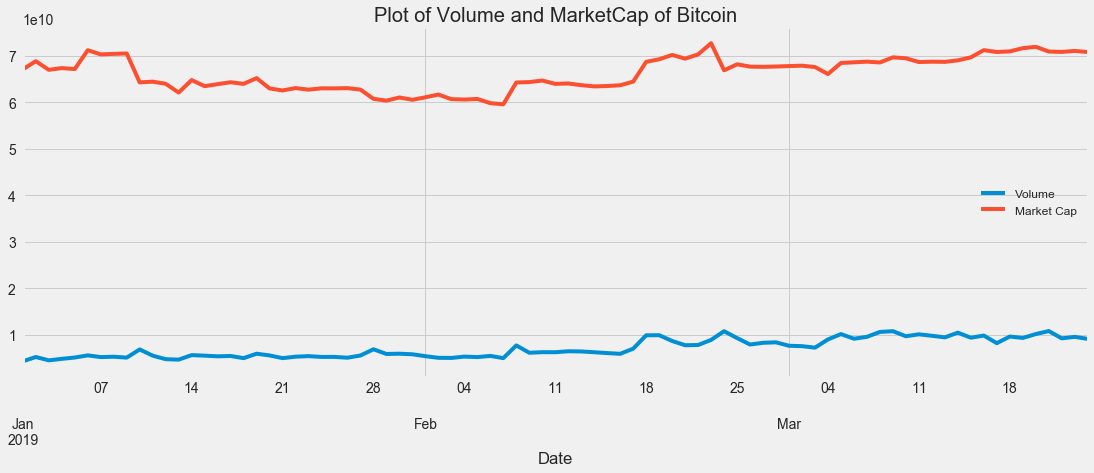

In [75]:
df.plot(figsize=(17,6), y=['Volume','Market Cap'],title='Plot of Volume and MarketCap of Bitcoin')
plt.show()

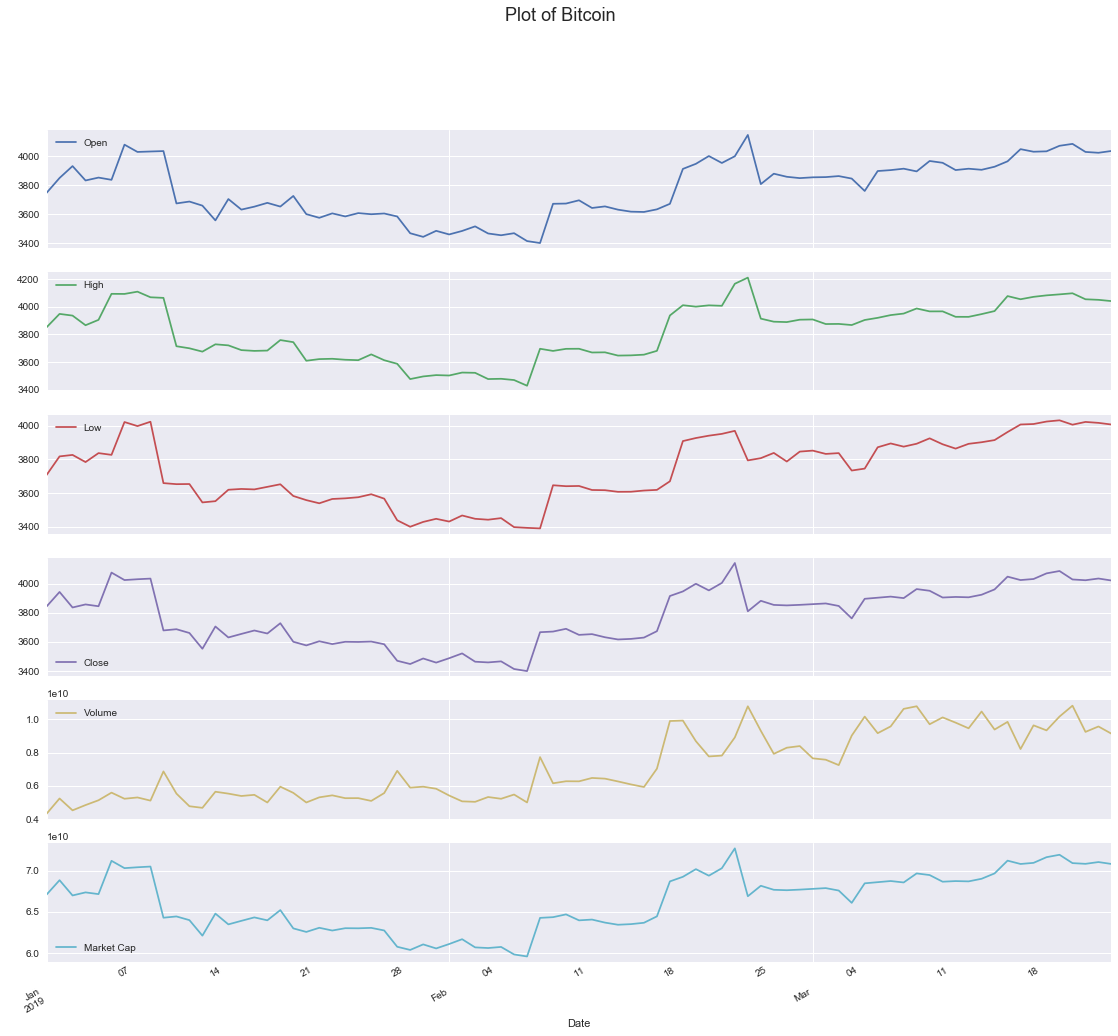

In [122]:
plt.style.use('seaborn')
df.plot(figsize=(17,17),title='Plot of Bitcoin',subplots=True)


plt.show()

In [77]:
plt.style.use('bmh')

import datetime
import numpy as np
import pandas as pd
import warnings
import itertools
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import matplotlib
import dateutil.parser as dparser
from statsmodels.tsa.stattools import adfuller # for dicky fuller test
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.stattools import acf,pacf 
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.stattools import ARMA
from statsmodels.tsa.statespace import sarimax
from sklearn.metrics import r2_score


matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

## Stationarize the time-series : 

- *Defination : Stationarity is important because in its absence a model describing the data will vary in accuracy at different time points. As such, stationarity is required for sample statistics such as means, variances, and correlations to accurately describe the data at all time points of interest.*

- The observations in a stationary time series are not dependent on time i.e. time series are stationary if they do not have trend or seasonal effects. 

- Summary statistics calculated on the time series are consistent over time, like the mean or the variance of the observations.


### Is the series Stationary ?
There are many methods to check whether a time series (direct observations, residuals, otherwise) is stationary or non-stationary.

1. Visual Inspection : By looking at the plots review the time series plot of your data and visually check if there are any obvious trends or seasonality.
2. Summary Statistics: Review the summary statistics for your data for seasons or random partitions and check for obvious or significant differences.
3. Statistical Tests: It is to check if the expectations of stationarity are met or have been violated.

### Visualize the decomposition of data

### Time Series components :
1. Trend ---> Long term
2. Seasonlity ---> Term(long-term which is periodic)
3. Cyclic(long-term)
4. Residual ---> Noise

#### No method applied, plotting the original dataset.

<Figure size 576x396 with 0 Axes>

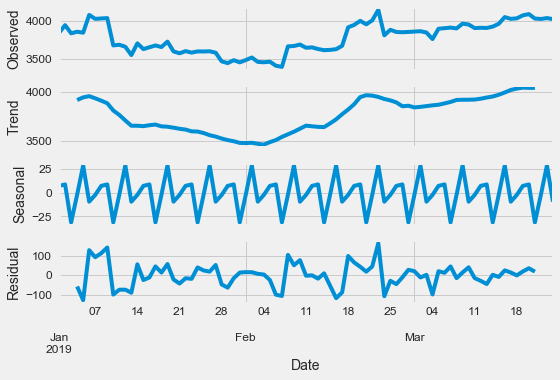

In [78]:
y = df['Close']
ts_decomp=seasonal_decompose(y)

fig = plt.figure()  
fig = ts_decomp.plot() 
plt.show()
fig.set_size_inches(12,5)

### Plot just the seasonal component

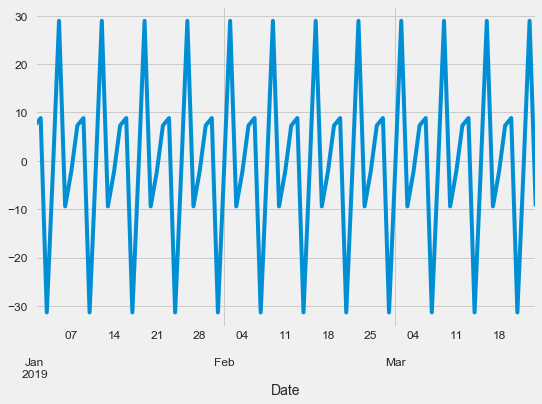

In [79]:
# grab just one graphic doing the following:
seasonal = ts_decomp.seasonal 
seasonal.plot()
plt.show()

#### Visualize the plot individually with respect to the 'Trend' for original series data.

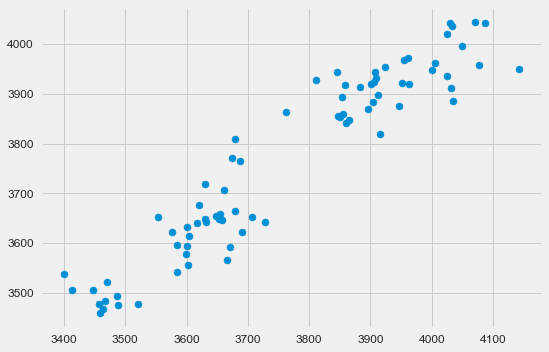

In [80]:
plt.scatter(x=y, y=ts_decomp.trend, label='Trend')

## Observation : Linear plot

### Modelling methods : 
    - When the magnitude of the seasonal and residual are independednt of the trend then use additive.
    - When the magnitude of the seasonal and residual influence/fluctuate with trend then use multiplicative.

### Multiplicative changes :: 
The magnitude of the seasonal change increases over time as the data values increase i.e. the magnitude of the peaks and drops increases as they vary consistently or seasonally over time.

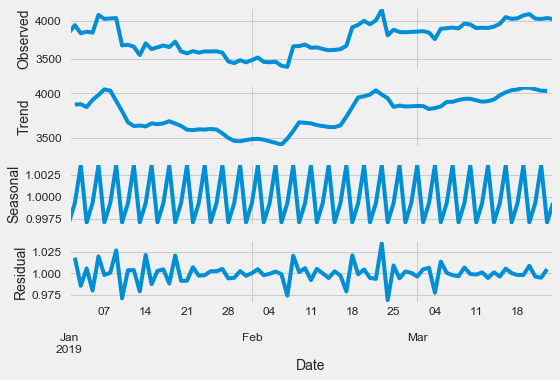

In [81]:
ts_decomp2=seasonal_decompose(y,freq=3,model='multiplicative')
ts_plot=ts_decomp2.plot()

### OBSERVATIONS on Multiplitive and Additive time-series plots.

Based on the below rules, the Bitcoin series data is Multiplicative as the Seasonal plot for no model applied and multiplicative is the same.

- If the magnitude of the seasonal changes is constant, then the seasonal changes are additive. 
- If the magnitude of the seasonal changes is greater when the data values are greater, then the seasonal changes are multiplicative. The extra variability can make multiplicative seasonal changes harder to forecast accurately

### Non Stationary to Stationarity

Make time stationary before modelling

### Stationarity test

In [82]:
# the above manipulation of stationary can be put in a function
def stationarity_test(data,window_type):
    price_rate=bitcoin_df.Close
    # rolling mean
    roll_mean=price_rate.rolling(window=window_type).mean()
    # rolling median
    roll_median=price_rate.rolling(window=window_type).median()
    # expanding
    exp=price_rate.expanding().mean()
    # exponentially weighted mean
    expo_mean=price_rate.ewm(span=10).mean()
    
    # import adf Augmented Dickey Fuller Test :: similar to t-test
    dft=adfuller(price_rate)
    dft_result=pd.Series(dft[:2], index=['T-stats','p-value'])
    print("********************************")
    print('Result of the Augmented Dickey Fuller Test')
    print(dft_result)
    print("********************************")
    
    rolling_list=(price_rate,roll_mean,roll_median,exp,expo_mean)
    label_list=('price_rate','roll_mean','roll_median','expanding','expo_mean')
    
    for u,v in zip(rolling_list,label_list):
        u.plot(label=v,figsize=(10,4), lw=3.5)
        plt.legend()

********************************
Result of the Augmented Dickey Fuller Test
T-stats   -2.196095
p-value    0.207666
dtype: float64
********************************


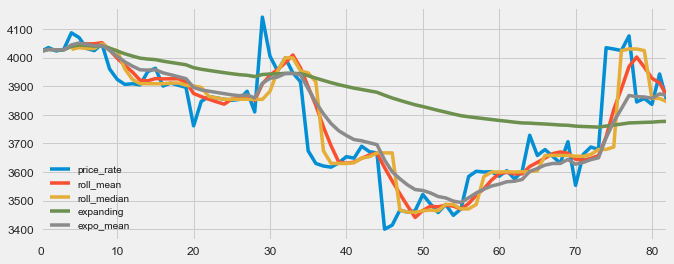

In [83]:
stationarity_test(bitcoin_df,window_type=5)

### OBSERVATION ::

- From the above Stationary test, the Time series is not stationary since the p-val = 0.21
- Now, I will apply the Dickey-Fuller Test.

Based on the reference ::
- p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.

- p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [123]:
bitcoin_df.to_csv('bitcoin_df.csv', index=False)

tweets_df = pd.read_csv('tweets_df.csv')
bitcoin_df = pd.read_csv('bitcoin_df.csv')

---

### Feature Engineering and Processing the tweets Data frame

In [86]:
stop = stopwords.words('english')
tweets_df['Tweet'] = tweets_df['Tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
tweets_df['Tweet'] = tweets_df['Tweet'].str.replace('[^\w\s]','')
tweets_df.head()

,Date,Tweet,SA,positive,neutral,negative
0,2019-01-01,What I said With ILP trillions transactions pe...,0.042857,True,False,False
1,2019-01-02,Bitcoin The Terrifying Rise Financial Blacklis...,-0.500000,False,False,True
2,2019-01-03,Happy birthday Bitcoin This bumblebee software...,0.525000,True,False,False
3,2019-01-04,FF Witty_Crypto kissmybtc Juni0rLancaster ltc_...,0.450000,True,False,False
4,2019-01-05,If bitcoin bank pocket RavenCoin 401kinvestmen...,0.000000,False,True,False


In [88]:
tweets_df.positive = tweets_df.positive.astype(int)
tweets_df.negative = tweets_df.negative.astype(int)
tweets_df.neutral = tweets_df.neutral.astype(int)

vectorizer = TfidfVectorizer(stop_words="english",min_df=0.1, ngram_range=(1,2))
X_train_counts = vectorizer.fit_transform(tweets_df['Tweet'])
feature_names = vectorizer.get_feature_names()
dense = X_train_counts.todense()
denselist = dense.tolist()

tfidf_df = pd.DataFrame(denselist, columns=feature_names, index=tweets_df['Tweet'])

In [89]:
bitcoin_df = bitcoin_df.iloc[::-1]
bitcoin_df.reset_index(inplace=True, drop = True)
tweets_df['Date'] = tweets_df['Date'].astype('datetime64[ns]')
bitcoin_df['Date'] = bitcoin_df['Date'].astype('datetime64[ns]')
df_1 = pd.merge(tweets_df, bitcoin_df,  how='inner',on = 'Date')
df_1.head()

,Date,Tweet,SA,positive,neutral,negative,Open,High,Low,Close,Volume,Market Cap
0,2019-01-01,What I said With ILP trillions transactions pe...,0.042857,1,0,0,3746.71,3850.91,3707.23,3843.52,4324200990,67098634181
1,2019-01-02,Bitcoin The Terrifying Rise Financial Blacklis...,-0.500000,0,0,1,3849.22,3947.98,3817.41,3943.41,5244856836,68849856732
2,2019-01-03,Happy birthday Bitcoin This bumblebee software...,0.525000,1,0,0,3931.05,3935.69,3826.22,3836.74,4530215219,66994920903
3,2019-01-04,FF Witty_Crypto kissmybtc Juni0rLancaster ltc_...,0.450000,1,0,0,3832.04,3865.93,3783.85,3857.72,4847965467,67368333500
4,2019-01-05,If bitcoin bank pocket RavenCoin 401kinvestmen...,0.000000,0,1,0,3851.97,3904.90,3836.90,3845.19,5137609824,67157570935


In [90]:
df_1.set_index('Tweet', inplace=True)
final_df = pd.merge(df_1, tfidf_df,  how='inner',on = 'Tweet')
final_df.head(2)

,Date,SA,positive,neutral,negative,Open,High,Low,Close,Volume,Market Cap,bitcoin,blockchain,btc,crypto
Tweet,,,,,,,,,,,,,,,
What I said With ILP trillions transactions per second become possible scalable digital asset like XRP Just Bitcoin slower expensive lacking governance doesnt make XRP religion Utility always winspictwittercomjnZvGSsBzv,2019-01-01,0.042857,1,0,0,3746.71,3850.91,3707.23,3843.52,4324200990,67098634181,1.0,0.0,0.0,0.0
Bitcoin The Terrifying Rise Financial Blacklisting httpsbuffly2CKzpS6,2019-01-02,-0.500000,0,0,1,3849.22,3947.98,3817.41,3943.41,5244856836,68849856732,1.0,0.0,0.0,0.0


In [92]:
final_df.to_csv('final_df.csv', index=False)
final_df = pd.read_csv('final_df.csv')
final_df.drop(['Date'], inplace=True, axis=1)
index = final_df.index
final_df.reset_index(inplace=True, drop=True)
final_df = final_df.dropna()
final_df.head()

,SA,positive,neutral,negative,Open,High,Low,Close,Volume,Market Cap,bitcoin,blockchain,btc,crypto
0,0.042857,1,0,0,3746.71,3850.91,3707.23,3843.52,4324200990,67098634181,1.000000,0.0,0.000000,0.0
1,-0.500000,0,0,1,3849.22,3947.98,3817.41,3943.41,5244856836,68849856732,1.000000,0.0,0.000000,0.0
2,0.525000,1,0,0,3931.05,3935.69,3826.22,3836.74,4530215219,66994920903,1.000000,0.0,0.000000,0.0
3,0.450000,1,0,0,3832.04,3865.93,3783.85,3857.72,4847965467,67368333500,0.000000,0.0,0.000000,0.0
4,0.000000,0,1,0,3851.97,3904.90,3836.90,3845.19,5137609824,67157570935,0.396971,0.0,0.917831,0.0


In [93]:
values = final_df.values
train = values[:int(final_df.shape[0]*0.90), :]
test = values[int(final_df.shape[0]*0.90)+1:final_df.shape[0], :]
# split into input and outputs
train_X, train_y = np.delete(train, 7, axis=1), train[:, 7]
test_X, test_y = np.delete(test, 7, axis=1), test[:, 7]

## Building  a Support Vector Regressor

In [94]:
from sklearn import metrics
from sklearn.svm import SVR

svm = SVR(kernel = 'rbf')
svm.fit(train_X,train_y)
predictions = svm.predict(test_X)
print('MAE:', metrics.mean_absolute_error(test_y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_y, predictions)))
display(pd.DataFrame({'True Close Price' : test_y, 'Predicted Close Price' : predictions}))

MAE: 342.8437500000001
RMSE: 343.6085694325741


,True Close Price,Predicted Close Price
0,4025.23,3698.12
1,4032.51,3698.12
2,4071.19,3698.12
3,4087.48,3698.12
4,4029.33,3698.12
5,4023.97,3698.12
6,4035.83,3698.12
7,4022.17,3698.12


#### With support Vector Machine, results are not very well, let's try Tree based algorithm.

## Building a Random Forest Regressor

In [95]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100, max_depth=2)
rf.fit(train_X,train_y)
predictions = rf.predict(test_X)
print('MAE:', metrics.mean_absolute_error(test_y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_y, predictions)))
display(pd.DataFrame({'True Close Price' : test_y, 'Predicted Close Price' : predictions}))

MAE: 31.336387681558904
RMSE: 38.819856598993994


,True Close Price,Predicted Close Price
0,4025.23,4009.627362
1,4032.51,4009.627362
2,4071.19,4009.627362
3,4087.48,4009.627362
4,4029.33,4009.627362
5,4023.97,4009.627362
6,4035.83,4009.627362
7,4022.17,4009.627362


## Xgboost Model

In [96]:
from sklearn import metrics
from xgboost import XGBRegressor

xgb = XGBRegressor(learning_rate=0.1)
xgb.fit(train_X,train_y)
predictions = xgb.predict(test_X)
print('MAE:', metrics.mean_absolute_error(test_y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_y, predictions)))
display(pd.DataFrame({'True Close Price' : test_y, 'Predicted Close Price' : predictions}))

MAE: 19.39117431640625
RMSE: 25.653319524739157


,True Close Price,Predicted Close Price
0,4025.23,4029.117920
1,4032.51,4070.323242
2,4071.19,4080.256836
3,4087.48,4080.256836
4,4029.33,4070.323242
5,4023.97,4028.976074
6,4035.83,4079.733887
7,4022.17,4029.405029


In [97]:
X_train, X_test, y_train, y_test = train_X, test_X, train_y, test_y

### LSTM

Now we have to reshape the data. As LSTM model,which we are going to build in next step only accepts input with 3-D shape. We are using numpy to do that. Below you can see the code of it and shape of the data also.

In [98]:
values = final_df.values
X, y = np.delete(values, 7, axis=1), values[:, 7]

from sklearn.preprocessing import StandardScaler
scalerX = MinMaxScaler(feature_range=(0,1))
scalerY = MinMaxScaler(feature_range=(0,1))
X = scalerX.fit_transform(X)
y = scalerY.fit_transform(y.reshape(-1,1))


train_X = X[:int(X.shape[0]*0.90), :]
test_X = X[int(X.shape[0]*0.90)+1:X.shape[0], :]

train_y = y[:int(y.shape[0]*0.90), :]
test_y = y[int(y.shape[0]*0.90)+1:y.shape[0], :]

print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(74, 13) (74, 1) (8, 13) (8, 1)


In [100]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)  
train_X = pca.fit_transform(train_X)  
test_X = pca.transform(test_X)  
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
train_y = np.reshape(train_y, (train_y.shape[0],))
test_y = np.reshape(test_y, (test_y.shape[0],))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(74, 1, 10) (74,) (8, 1, 10) (8,)


In [103]:
# Build our Model
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold

model = Sequential()
model.add(LSTM(128, input_shape=(1, train_X.shape[2]), return_sequences=False))
model.add(Dense(64, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='rmsprop')
print(model.summary())
model.fit(train_X, train_y, epochs=100, batch_size=2,
          validation_data=(test_X, test_y), verbose=2)
trainPredict = model.predict(train_X)
testPredict = model.predict(test_X)

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128)               71168     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 80,481
Trainable params: 80,481
Non-trainable params: 0
_________________________________________________________________
None
Instructions for updating:
Use tf.cast instead.
Train on 74 samples, validate on 8 samples
Epoch 1/100
 - 1s - loss: 0.0878 - val_loss: 0.0035
Epoch 2/100
 - 0s - loss: 0.0063 - val_loss: 0.003

In [104]:
print('Train RMSE:', np.sqrt(metrics.mean_squared_error(train_y, trainPredict[:, 0])))
print('Test RMSE:', np.sqrt(metrics.mean_squared_error(test_y, testPredict[:, 0])))

display(pd.DataFrame({'True Close Price' : test_y, 'Predicted Close Price' : testPredict[:, 0]}))

Train RMSE: 0.025330022272978994
Test RMSE: 0.04124918590069188


,True Close Price,Predicted Close Price
0,0.842139,0.803344
1,0.851937,0.826184
2,0.903992,0.850370
3,0.925914,0.875366
4,0.847657,0.790542
5,0.840444,0.805765
6,0.856405,0.837596
7,0.838021,0.803454


# Tuning Xgboost Model

Now we will tune xgboost parameters using hyperopt!

XGBoost is also an based on an ensemble of decision trees, but different from random forest. The trees are not averaged, but added. The decision trees are trained to correct residuals from the previous trees. The idea is that many small decision trees are trained, each adding a bit of info to improve overall predictions.

I will follow this guide for tuning Tuning XGBoost

I'm initially fixing the number of trees to 500 and learning rate to 0.05 (determined that with a quick experiment) - then we can find good values for the other parameters. Later we can re-iterate this.

The most important parameters are:

- Number of trees (n_estimators)
- Learning rate - later trees have less influence (learning_rate)
- Tree complexity (max_depth)
- Gamma - Make individual trees conservative, reduce overfitting
- Column sample per tree - reduce overfitting

In [105]:
from xgboost.sklearn import XGBRegressor  
import scipy.stats as st

one_to_left = st.beta(10, 1)  
from_zero_positive = st.expon(0, 50)

params = {  
    "n_estimators": [100],
    "max_depth": [3,5,7,9,13],
    "learning_rate": [0.01,0.05,0.09,0.1,0.3,0.5,0.7,0.9],
    "colsample_bytree": one_to_left,
    "gamma": [0.01,0.05,0.09,0.1,0.3,0.5,0.7,0.9],
    'reg_alpha': from_zero_positive,
}

xgbreg = XGBRegressor(nthreads=-1)  

from sklearn.model_selection import RandomizedSearchCV
gs = RandomizedSearchCV(xgbreg, params, n_jobs=1, verbose=2)  
gs.fit(X_train, y_train)  
gs.best_estimator_  

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] colsample_bytree=0.9480925292395379, gamma=0.09, learning_rate=0.5, max_depth=9, n_estimators=100, reg_alpha=127.90450255245776 
[CV]  colsample_bytree=0.9480925292395379, gamma=0.09, learning_rate=0.5, max_depth=9, n_estimators=100, reg_alpha=127.90450255245776, total=   0.0s
[CV] colsample_bytree=0.9480925292395379, gamma=0.09, learning_rate=0.5, max_depth=9, n_estimators=100, reg_alpha=127.90450255245776 
[CV]  colsample_bytree=0.9480925292395379, gamma=0.09, learning_rate=0.5, max_depth=9, n_estimators=100, reg_alpha=127.90450255245776, total=   0.0s
[CV] colsample_bytree=0.9480925292395379, gamma=0.09, learning_rate=0.5, max_depth=9, n_estimators=100, reg_alpha=127.90450255245776 
[CV]  colsample_bytree=0.9480925292395379, gamma=0.09, learning_rate=0.5, max_depth=9, n_estimators=100, reg_alpha=127.90450255245776, total=   0.0s
[CV] colsample_bytree=0.9630845158693245, gamma=0.7, learning_rate=0.7, max_depth=7, n_est

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  colsample_bytree=0.9776775982803618, gamma=0.5, learning_rate=0.9, max_depth=3, n_estimators=100, reg_alpha=2.5159827612374466, total=   0.0s
[CV] colsample_bytree=0.9351923601213873, gamma=0.7, learning_rate=0.9, max_depth=3, n_estimators=100, reg_alpha=16.70538961886815 
[CV]  colsample_bytree=0.9351923601213873, gamma=0.7, learning_rate=0.9, max_depth=3, n_estimators=100, reg_alpha=16.70538961886815, total=   0.0s
[CV] colsample_bytree=0.9351923601213873, gamma=0.7, learning_rate=0.9, max_depth=3, n_estimators=100, reg_alpha=16.70538961886815 
[CV]  colsample_bytree=0.9351923601213873, gamma=0.7, learning_rate=0.9, max_depth=3, n_estimators=100, reg_alpha=16.70538961886815, total=   0.0s
[CV] colsample_bytree=0.9351923601213873, gamma=0.7, learning_rate=0.9, max_depth=3, n_estimators=100, reg_alpha=16.70538961886815 
[CV]  colsample_bytree=0.9351923601213873, gamma=0.7, learning_rate=0.9, max_depth=3, n_estimators=100, reg_alpha=16.70538961886815, total=   0.0s
[CV] colsample_

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.3s finished


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.9480925292395379, gamma=0.09,
       importance_type='gain', learning_rate=0.5, max_delta_step=0,
       max_depth=9, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, nthreads=-1, objective='reg:linear',
       random_state=0, reg_alpha=127.90450255245776, reg_lambda=1,
       scale_pos_weight=1, seed=None, silent=True, subsample=1)

In [106]:
tuned_model = gs.best_estimator_  
predictions = tuned_model.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
display(pd.DataFrame({'True Close Price' : y_test, 'Predicted Close Price' : predictions}))

MAE: 20.220947265625
RMSE: 31.280665845408155


,True Close Price,Predicted Close Price
0,4025.23,4027.976074
1,4032.51,4020.276367
2,4071.19,4022.169189
3,4087.48,4017.252686
4,4029.33,4017.252686
5,4023.97,4022.169189
6,4035.83,4022.169189
7,4022.17,4022.169189


---